In [2]:
import numpy as np
import matplotlib.pyplot as plt

1d

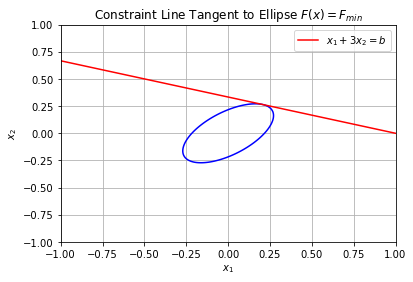

In [9]:
#arbitrary b
b=1 
S=np.array([[5, -3], [-3, 5]])

F_min = 2*b**2 /17

x1_vals=np.linspace(-1,1, 200)
x2_vals=np.linspace(-1,1, 200)
X1, X2=np.meshgrid(x1_vals, x2_vals)


F_x=0.5*(5*X1**2+5*X2**2-6*X1*X2)

#contour of F_x=F_min
plt.contour(X1,X2,F_x,levels=[F_min], colors='b')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Constraint Line Tangent to Ellipse $F(x) = F_{min}$')

#constraint
plt.plot(x1_vals,(b -x1_vals)/3,color='r',label=r'$x_1 + 3x_2 = b$')

plt.legend()
plt.grid(True)
plt.savefig("1d.png",dpi=300)
plt.show()

2d

In [122]:
S=np.array([[5,-3], [-3,5]])
x0=np.array([3,5])

eigenvalues, eigenvectors=np.linalg.eig(S)
lam_max=max(eigenvalues)
lam_min=min(eigenvalues)

alpha=1/(lam_max)

x_k= x0
vals=[x_k]

for i in range(6):
    x_k=x_k-alpha*S@x_k
    vals.append(x_k)

for i, x in enumerate(vals):
    print(f"Step {i}: x = {x}")

Step 0: x = [3 5]
Step 1: x = [3. 3.]
Step 2: x = [2.25 2.25]
Step 3: x = [1.6875 1.6875]
Step 4: x = [1.265625 1.265625]
Step 5: x = [0.94921875 0.94921875]
Step 6: x = [0.71191406 0.71191406]


e

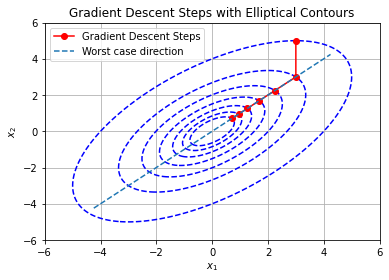

In [123]:
def F(x):
    return 0.5 *x.T@S@ x

#find and sort contour levels (have to be strictly increasing for plt.contour)
contour_levels=sorted([F(x) for x in vals])

x_vals=np.linspace(-6,6,400)
y_vals=np.linspace(-6,6,400)
X,Y=np.meshgrid(x_vals,y_vals)
Z=0.5*(S[0, 0]*X**2+2*S[0,1]*X*Y+S[1, 1]*Y**2)

plt.contour(X,Y,Z,levels=contour_levels,colors='b',linestyles='dashed')

vals=np.array(vals)
plt.plot(vals[:,0],vals[:,1],'o-',color='r',label='Gradient Descent Steps')

lam_max_idx=np.argmax(eigenvalues)
vec_max=eigenvectors[:,lam_max_idx]

line = np.array([vec_max * t for t in np.linspace(-6, 6, 2)])
#-1 const
plt.plot(line[:, 0],-line[:, 1],'--',label='Worst case direction')


plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Gradient Descent Steps with Elliptical Contours")
plt.legend()
plt.grid(True)

plt.show()


f

In [124]:
errors=[np.linalg.norm(x) for x in vals]
for i,e_k in enumerate(errors):
    print(f"Step{i}:Error e_{i}={e_k}")

print("\nConvergence over the first three steps:")
error_ratios=[errors[i+1]/errors[i] for i in range(len(errors)-1)]
for i in range(3):
    print(f"Error ratio e_{i+1}/e_{i}={error_ratios[i]}")

Step0:Error e_0=5.830951894845301
Step1:Error e_1=4.242640687119285
Step2:Error e_2=3.181980515339464
Step3:Error e_3=2.386485386504598
Step4:Error e_4=1.7898640398784484
Step5:Error e_5=1.3423980299088363
Step6:Error e_6=1.0067985224316272

Convergence over the first three steps:
Error ratio e_1/e_0=0.7276068751089988
Error ratio e_2/e_1=0.75
Error ratio e_3/e_2=0.7500000000000001


Roughly linear, bar first ratio almost completely linear

3a

In [125]:
alpha=4/(np.sqrt(lam_max)+np.sqrt(lam_min))**2
beta=((np.sqrt(lam_max)-np.sqrt(lam_min))/(np.sqrt(lam_max)+np.sqrt(lam_min)))**2

x_k=x0
v_k=np.array([0,0])
vals=[x_k]

for i in range(6):
    v_k=beta*v_k-alpha*(S@x_k)
    x_k=x_k+v_k
    vals.append(x_k)

for i, x in enumerate(vals):
    print(f"Step {i}: x = {x}")

Step 0: x = [3 5]
Step 1: x = [3.         1.44444444]
Step 2: x = [0.62962963 1.44444444]
Step 3: x = [0.62962963 0.25925926]
Step 4: x = [0.10288066 0.25925926]
Step 5: x = [0.10288066 0.03978052]
Step 6: x = [0.01508916 0.03978052]


b

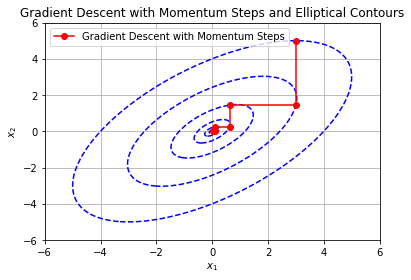

In [126]:
#find and sort contour levels (have to be strictly increasing for plt.contour)
contour_levels = sorted([F(x) for x in vals])

plt.contour(X,Y,Z,levels=contour_levels,colors='b',linestyles='dashed')

vals=np.array(vals)
plt.plot(vals[:,0],vals[:,1],'o-',color='r',label='Gradient Descent with Momentum Steps')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Gradient Descent with Momentum Steps and Elliptical Contours")
plt.legend()
plt.grid(True)
plt.show()

c

In [127]:
errors=[np.linalg.norm(x) for x in vals]
for i,e_k in enumerate(errors):
    print(f"Step{i}:Error e_{i}={e_k}")
    
print("\nConvergence over the first three steps:")
error_ratios1=[errors[i+1]/errors[i] for i in range(len(errors)-1)]
for i in range(3):
    print(f"Error ratio e_{i+1}/e_{i}={error_ratios1[i]}")

Step0:Error e_0=5.830951894845301
Step1:Error e_1=3.329627569727043
Step2:Error e_2=1.5757072137913068
Step3:Error e_3=0.6809176411426004
Step4:Error e_4=0.27892614325646925
Step5:Error e_5=0.11030376127832407
Step6:Error e_6=0.042546124607052815

Convergence over the first three steps:
Error ratio e_1/e_0=0.5710264172596781
Error ratio e_2/e_1=0.47323827689247555
Error ratio e_3/e_2=0.4321346219544464


d

In [129]:
print(error_ratios)
print('\n',error_ratios1)

[0.7276068751089988, 0.75, 0.7500000000000001, 0.75, 0.75, 0.75]

 [0.5710264172596781, 0.47323827689247555, 0.4321346219544464, 0.40963271679732477, 0.3954586687017756, 0.3857178043067658]


**Without Momentum**: Gradient descent without momentum reduces the error linearly but relatively slowly, without acceleration, depending directly on the step size and the condition number of S.

**With Momentum**: Momentum accelerates convergence (rather than a linear convergence) by including a "memory" of the previous step. This leads to a faster error reduction, especially in directions associated with smaller eigenvalues. As can be seen in our error ratios for both, with momentum shows a quicker drop in error, achieving faster convergence compared to standard gradient descent.
